**In hospital mortality for heart failure (HF) patients in the Intensive Care Unit (ICU)**

**Group 3**

*Atharva Kulkarni (ak5070), Divya Tadimeti (dt2760), Xiaoyi Zhou (xz3126), Yolanda Zhu (xz3013), Yu Yen Liu (cl4202)*

In this notebook, we deal with the imbalanced dataset and perform modeling on the data.

In [ ]:
# Codlab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data01.csv')
#df = pd.read_csv('/content/data01.csv')

In [ ]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
column_info = df.dtypes

print(column_info)

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

# Initial analysis

In [ ]:
missing_count = df.isnull().sum()

print(missing_count)

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

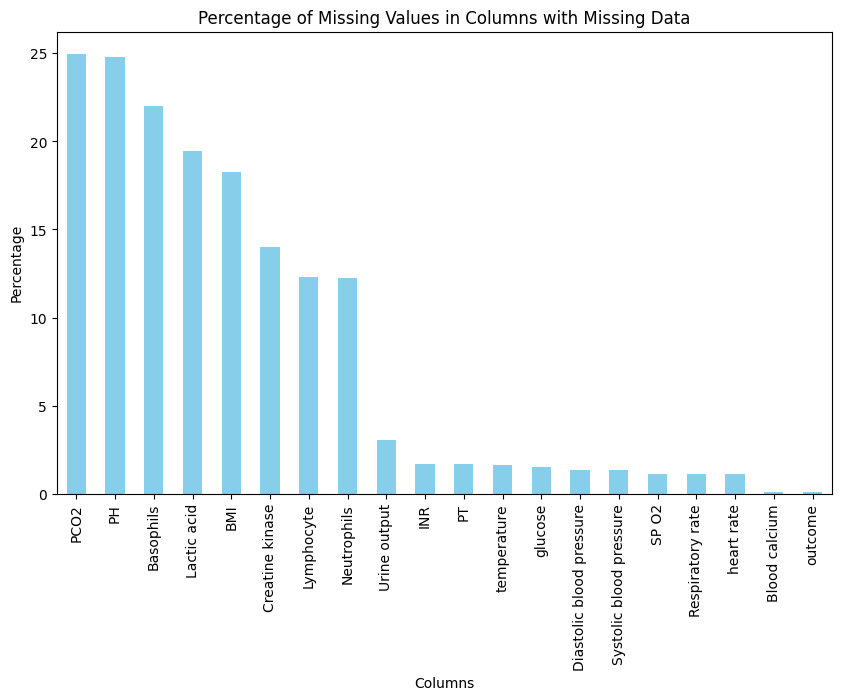

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

# Filter columns where missing values are greater than 0
missing_cols = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
missing_cols.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Columns with Missing Data')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

Drop features with >10% missing values, and impute for the rest of the features.

In [ ]:
# Filter columns with missing values >= 10%
columns_to_drop = missing_percentage[missing_percentage >= 10].index

# Drop columns with 10% or more missing values
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,group,ID,outcome,age,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,EF
0,1,125047,0.0,72,1,0,0,0,1,1,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,55
1,1,139812,0.0,75,2,0,0,0,0,1,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,55
2,1,109787,0.0,83,2,0,0,0,0,1,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,35
3,1,130587,0.0,43,2,0,0,0,0,0,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,55
4,1,138290,0.0,75,2,1,0,0,0,1,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,55


In [ ]:
# Drop rows where "outcome" column value is missing (this is true for only one row)
df.dropna(subset=['outcome'], inplace=True)

In [ ]:
# For the other columns with <10% of missing values, impute with the mean
df.fillna(df.mean(), inplace=True)
df.head()

,group,ID,outcome,age,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,EF
0,1,125047,0.0,72,1,0,0,0,1,1,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,55
1,1,139812,0.0,75,2,0,0,0,0,1,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,55
2,1,109787,0.0,83,2,0,0,0,0,1,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,35
3,1,130587,0.0,43,2,0,0,0,0,0,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,55
4,1,138290,0.0,75,2,1,0,0,0,1,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,55


In [ ]:
# Confirming that there are no missing values left
missing_count = df.isnull().sum()

print(missing_count)

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
PT                          0
INR                         0
NT-proBNP                   0
Creatinine                  0
Urea nitro

In [ ]:
target_distribution = df['outcome'].value_counts()
print(target_distribution)

0.0    1017
1.0     159
Name: outcome, dtype: int64


We see that the dataset is highly imbalanced, with the majority class being 0, and the minority class being 1.

In [ ]:
# Check for highly correlated features

# Calculate correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-156-e6bae9cd7053>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop

['RBC', 'MCV', 'INR']

In [ ]:
# Drop highly correlated columns
df.drop(columns=to_drop, inplace=True)

In [ ]:
df.head()

,group,ID,outcome,age,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,EF
0,1,125047,0.0,72,1,0,0,0,1,1,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,55
1,1,139812,0.0,75,2,0,0,0,0,1,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,55
2,1,109787,0.0,83,2,0,0,0,0,1,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,35
3,1,130587,0.0,43,2,0,0,0,0,0,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,55
4,1,138290,0.0,75,2,1,0,0,0,1,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,55


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['outcome','ID', 'group'])
y = df['outcome'].astype(int)

# Split the data into development and test sets with stratified sampling because of highly imbalanced data
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Not doing scaling for now, as tree based methods don't need it

In [ ]:
# # Identify binary columns
# binary_columns_dev = [col for col in X_dev.columns if df[col].nunique() == 2]
# # Separate binary and non-binary columns
# binary_data_dev = X_dev[binary_columns_dev]
# non_binary_data_dev = X_dev.drop(columns=binary_columns_dev)

# # Apply StandardScaler on non-binary columns
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(non_binary_data_dev)

# # Create DataFrame with scaled data
# scaled_df = pd.DataFrame(scaled_data, columns=non_binary_data_dev.columns)

# # Concatenate binary and scaled non-binary data
# final_df = pd.concat([binary_data_dev, scaled_df], axis=1)
# X_dev_scaled = final_df

# # Identify binary columns
# binary_columns_test = [col for col in X_test.columns if df[col].nunique() == 2]

# # Separate binary and non-binary columns
# binary_data_test = X_test[binary_columns_test]
# non_binary_data_test = X_test.drop(columns=binary_columns_test)

# # Apply StandardScaler on non-binary columns
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(non_binary_data_test)

# # Create DataFrame with scaled data
# scaled_df = pd.DataFrame(scaled_data, columns=non_binary_data_test.columns)

# # Concatenate binary and scaled non-binary data
# final_df = pd.concat([binary_data_test, scaled_df], axis=1)
# X_test_scaled = final_df

## Default Baseline
Fitting a default Decision tree classifier (using max_depth=10 and random_state=42). Printing the AUC and Average Precision values of 5 Fold Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score


dt_classifier_baseline = DecisionTreeClassifier(max_depth=10, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = cross_val_score(dt_classifier_baseline, X_dev, y_dev, cv=cv, scoring='roc_auc')
ap_scores = cross_val_score(dt_classifier_baseline, X_dev, y_dev, cv=cv, scoring='average_precision')


print("AUC scores for 5-fold cross-validation:")
for i, auc_score in enumerate(auc_scores):
    print(f"Fold {i + 1}: {auc_score:.2f}")

print("\nAverage Precision scores for 5-fold cross-validation:")
for i, ap_score in enumerate(ap_scores):
    print(f"Fold {i + 1}: {ap_score:.2f}")


mean_auc = auc_scores.mean()
mean_ap = ap_scores.mean()
print("\nMean AUC:", mean_auc)
print("Mean Average Precision:", mean_ap)

AUC scores for 5-fold cross-validation:
Fold 1: 0.56
Fold 2: 0.62
Fold 3: 0.43
Fold 4: 0.53
Fold 5: 0.57

Average Precision scores for 5-fold cross-validation:
Fold 1: 0.23
Fold 2: 0.26
Fold 3: 0.13
Fold 4: 0.22
Fold 5: 0.23

Mean AUC: 0.5426156759244695
Mean Average Precision: 0.21535928336438145


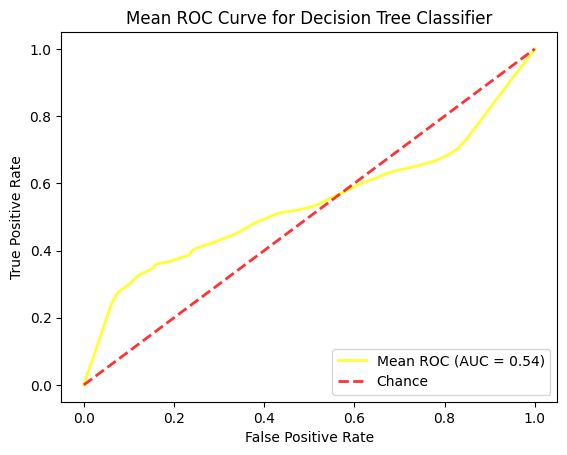

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Initialize DecisionTreeClassifier
dt_classifier_baseline = DecisionTreeClassifier(max_depth=10, random_state=42)

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get predicted probabilities using cross_val_predict
y_probas = cross_val_predict(dt_classifier_baseline, X_dev, y_dev, cv=cv, method='predict_proba')

# Initialize variables to store metrics
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Compute ROC curve for each fold
for i in range(5):
    # Compute FPR, TPR for each fold
    fpr, tpr, thresholds = roc_curve(y_dev[i::5], y_probas[i::5, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Compute mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='yellow', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

## Trying Random Oversampling

In [ ]:
from sklearn.utils import shuffle
np.random.seed(42)


# Split the development set into positive (minority) and negative (majority) classes
X_positive_dev = X_dev[y_dev == 1]
X_negative_dev = X_dev[y_dev == 0]

min_class_count_dev = min(len(X_positive_dev), len(X_negative_dev))

# Oversample the positive class in the development set by randomly duplicating instances
oversampled_indices = np.random.choice(len(X_positive_dev), size=min_class_count_dev, replace=True)
X_positive_oversampled_dev = X_positive_dev.iloc[oversampled_indices]

# Combine the oversampled positive class with the negative class in the development set
X_dev_oversampled = pd.concat([X_positive_oversampled_dev, X_negative_dev], ignore_index=True)
y_dev_oversampled = pd.Series([1] * min_class_count_dev + [0] * len(X_negative_dev))

# Shuffle the combined development dataset
X_dev_oversampled, y_dev_oversampled = shuffle(X_dev_oversampled, y_dev_oversampled)

positive_count_dev = sum(y_dev_oversampled == 1)
negative_count_dev = sum(y_dev_oversampled == 0)

print("Number of positive labels after oversampling on the development set:", positive_count_dev)
print("Number of negative labels after oversampling on the development set:", negative_count_dev)
print("Shape of the oversampled development dataset:", X_dev_oversampled.shape)

Number of positive labels after oversampling on the development set: 127
Number of negative labels after oversampling on the development set: 813
Shape of the oversampled development dataset: (940, 37)


## Retrying the Decision Tree classifer from above

In [ ]:
dt_classifier_oversampled = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores = cross_val_score(dt_classifier_oversampled, X_dev_oversampled, y_dev_oversampled, cv=5, scoring='roc_auc')

ap_scores = cross_val_score(dt_classifier_oversampled, X_dev_oversampled, y_dev_oversampled, cv=5, scoring='average_precision')

print("AUC scores for 5-fold cross-validation:")
for fold, auc_score in enumerate(auc_scores, 1):
    print(f"Fold {fold}: {auc_score:.4f}")

print("\nAverage Precision scores for 5-fold cross-validation:")
for fold, ap_score in enumerate(ap_scores, 1):
    print(f"Fold {fold}: {ap_score:.4f}")

mean_auc = auc_scores.mean()
mean_ap = ap_scores.mean()

print("\nMean AUC:", mean_auc)
print("Mean Average Precision:", mean_ap)

AUC scores for 5-fold cross-validation:
Fold 1: 0.6858
Fold 2: 0.8324
Fold 3: 0.8550
Fold 4: 0.7279
Fold 5: 0.8253

Average Precision scores for 5-fold cross-validation:
Fold 1: 0.4032
Fold 2: 0.5172
Fold 3: 0.5125
Fold 4: 0.3998
Fold 5: 0.4711

Mean AUC: 0.7852620441741096
Mean Average Precision: 0.4607765354155628


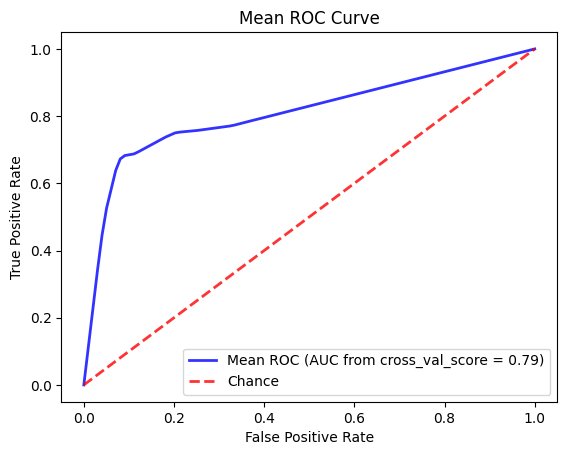

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc

dt_classifier_oversampled = DecisionTreeClassifier(max_depth=10, random_state=42)

# Use cross_val_score to get the average AUC across folds
auc_scores = cross_val_score(dt_classifier_oversampled, X_dev_oversampled, y_dev_oversampled, cv=5, scoring='roc_auc')
mean_auc_score = np.mean(auc_scores)

# Get predicted probabilities
y_probas = cross_val_predict(dt_classifier_oversampled, X_dev_oversampled, y_dev_oversampled, cv=5, method='predict_proba')

# Initialize variables to store metrics
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Compute ROC curve for each fold
for i in range(5):
    fpr, tpr, thresholds = roc_curve(y_dev_oversampled[i::5], y_probas[i::5, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

# Compute mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot mean ROC curve using the average TPRs
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean ROC (AUC from cross_val_score = {mean_auc_score:.2f})', lw=2, alpha=0.8)

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Trying SMOTE
Performing Synthetic Minority Oversampling Technique (SMOTE) on the development dataset

In [ ]:
X_positive = X_dev[y_dev == 1]
X_negative = X_dev[y_dev == 0]

min_class_count = min(len(X_positive), len(X_negative))

# Calculate the number of synthetic samples to generate
num_synthetic_samples = len(X_negative) - min_class_count

# Generate synthetic samples for the minority class
synthetic_samples = []
for i in range(num_synthetic_samples):
    idx = np.random.randint(0, len(X_positive))
    sample = X_positive.iloc[idx] + np.random.rand() * (X_positive.iloc[idx] - X_positive.iloc[idx - 1])
    synthetic_samples.append(sample)

synthetic_samples_df = pd.DataFrame(synthetic_samples, columns=X.columns)
y_synthetic = pd.Series([1] * num_synthetic_samples)

# Concatenate the synthetic samples with the original dev dataset
X_dev_smote = pd.concat([X, synthetic_samples_df], ignore_index=True)
y_dev_smote = pd.concat([y, y_synthetic], ignore_index=True)

# Shuffle the combined dev dataset
combined_data = pd.concat([X_dev_smote, y_dev_smote], axis=1)
combined_data = combined_data.sample(frac=1, random_state=42)

positive_count_after_smote = sum(y_dev_smote == 1)
negative_count_after_smote = sum(y_dev_smote == 0)

print("Number of positive labels after SMOTE:", positive_count_after_smote)
print("Number of negative labels after SMOTE:", negative_count_after_smote)
print("Shape of the development dataset after SMOTE:", X_dev_smote.shape)

Number of positive labels after SMOTE: 845
Number of negative labels after SMOTE: 1017
Shape of the development dataset after SMOTE: (1862, 37)


## Trying Decision Tree classifier again after SMOTE

In [ ]:
dt_classifier_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

auc_scores_smote = cross_val_score(dt_classifier_smote, X_dev_smote, y_dev_smote, cv=5, scoring='roc_auc')

ap_scores_smote = cross_val_score(dt_classifier_smote, X_dev_smote, y_dev_smote, cv=5, scoring='average_precision')

print("AUC scores for 5-fold cross-validation on SMOTE data:")
for fold, auc_score in enumerate(auc_scores_smote, 1):
    print(f"Fold {fold}: {auc_score:.4f}")

print("\nAverage Precision scores for 5-fold cross-validation on SMOTE data:")
for fold, ap_score in enumerate(ap_scores_smote, 1):
    print(f"Fold {fold}: {ap_score:.4f}")

mean_auc_smote = auc_scores_smote.mean()
mean_ap_smote = ap_scores_smote.mean()

print("\nMean AUC on SMOTE data:", mean_auc_smote)
print("Mean Average Precision on SMOTE data:", mean_ap_smote)

AUC scores for 5-fold cross-validation on SMOTE data:
Fold 1: 0.5130
Fold 2: 0.9706
Fold 3: 0.9409
Fold 4: 0.9669
Fold 5: 0.9641

Average Precision scores for 5-fold cross-validation on SMOTE data:
Fold 1: 0.4726
Fold 2: 0.9339
Fold 3: 0.8907
Fold 4: 0.9512
Fold 5: 0.9577

Mean AUC on SMOTE data: 0.8711036934667767
Mean Average Precision on SMOTE data: 0.8411988028117386


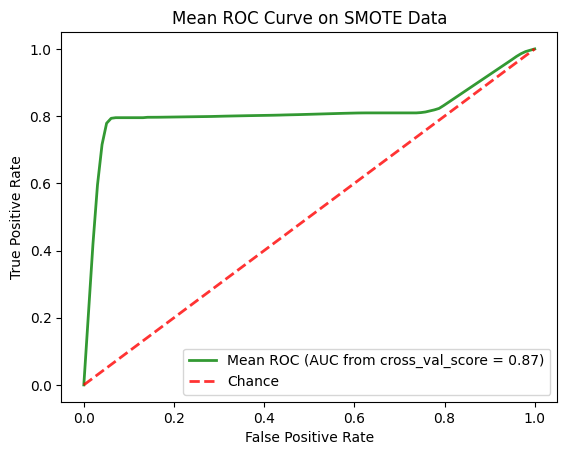

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc

dt_classifier_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

# Use cross_val_score to get the average AUC across folds for SMOTE data
auc_scores_smote = cross_val_score(dt_classifier_smote, X_dev_smote, y_dev_smote, cv=5, scoring='roc_auc')
mean_auc_score_smote = np.mean(auc_scores_smote)

# Get predicted probabilities using cross_val_predict
y_probas_smote = cross_val_predict(dt_classifier_smote, X_dev_smote, y_dev_smote, cv=5, method='predict_proba')

# Initialize variables to store metrics
tprs_smote = []
mean_fpr_smote = np.linspace(0, 1, 100)

# Compute ROC curve for each fold
for i in range(5):
    fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_dev_smote[i::5], y_probas_smote[i::5, 1])
    tprs_smote.append(np.interp(mean_fpr_smote, fpr_smote, tpr_smote))
    tprs_smote[-1][0] = 0.0

# Compute mean ROC curve
mean_tpr_smote = np.mean(tprs_smote, axis=0)
mean_tpr_smote[-1] = 1.0
mean_auc_smote = auc(mean_fpr_smote, mean_tpr_smote)

# Plot mean ROC curve using the average TPRs
plt.plot(mean_fpr_smote, mean_tpr_smote, color='green', label=f'Mean ROC (AUC from cross_val_score = {mean_auc_score_smote:.2f})', lw=2, alpha=0.8)

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve on SMOTE Data')
plt.legend(loc="lower right")
plt.show()

### We will use the SMOTE dataset as it had the best metrics above

## Fit Decision Tree model with SMOTE dev data and then visualize metrics

In [ ]:
from sklearn.metrics import roc_auc_score


def evaluate_model(model, X_test):
    predictions = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, predictions)
    return auc

dt_classifier_smote.fit(X_dev_smote, y_dev_smote)
auc_smote = evaluate_model(dt_classifier_smote, X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Model: SMOTE
Accuracy: 0.90
Precision: 0.90
Recall: 0.28
F1 Score: 0.43
AUC Score: 0.65

Confusion Matrix:
[[203   1]
 [ 23   9]]


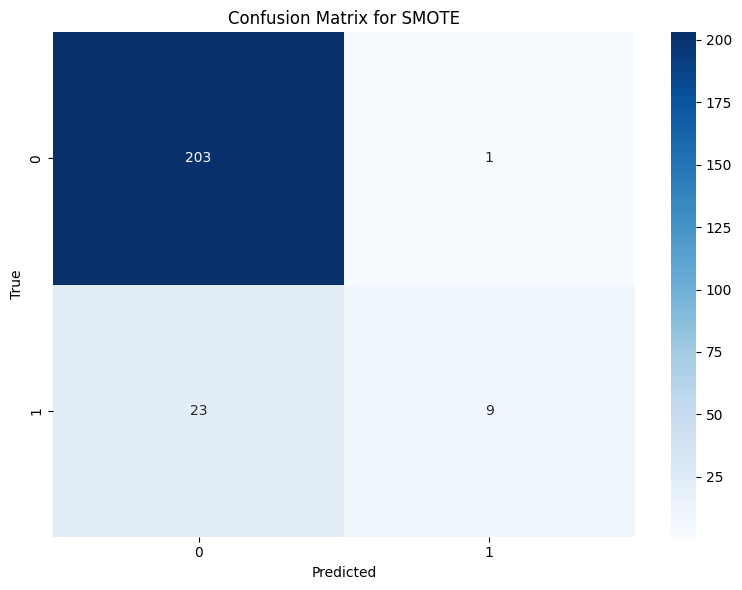

In [ ]:
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix for {model_name}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

def analyze_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f'AUC Score: {auc_smote:.2f}')
    print("\nConfusion Matrix:")
    print(cm)
    print("="*40)

    return cm

fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # Create a single subplot
models = [
    (dt_classifier_smote, "SMOTE")
]

for model, model_name in models:
    cm = analyze_confusion_matrix(model, X_test, y_test, model_name)  # Get the confusion matrix
    plot_confusion_matrix(ax, cm, model_name)

plt.tight_layout()
plt.show()



### After trying Decision Tree, we next try Ensemble Methods

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_dev_smote, y_dev_smote)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

feature_names = X_dev_smote.columns
feature_importances = dict(zip(feature_names, importances))

for feature_name, importance in feature_importances.items():
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: age, Importance: 0.03095361838029612
Feature: gendera, Importance: 0.047566096645160295
Feature: hypertensive, Importance: 0.11573859906709186
Feature: atrialfibrillation, Importance: 0.06077198052488574
Feature: CHD with no MI, Importance: 0.0013636797821751318
Feature: diabetes, Importance: 0.036215867652644444
Feature: deficiencyanemias, Importance: 0.022012158632978354
Feature: depression, Importance: 0.002423948276778561
Feature: Hyperlipemia, Importance: 0.033313285209343096
Feature: Renal failure, Importance: 0.028721089089073844
Feature: COPD, Importance: 0.0028541058258091646
Feature: heart rate, Importance: 0.014276754367109163
Feature: Systolic blood pressure, Importance: 0.027004410614421437
Feature: Diastolic blood pressure, Importance: 0.010919734695701514
Feature: Respiratory rate, Importance: 0.018360476979777867
Feature: temperature, Importance: 0.02108567195172077
Feature: SP O2, Importance: 0.013030451197218339
Feature: Urine output, Importance: 0.0360872147

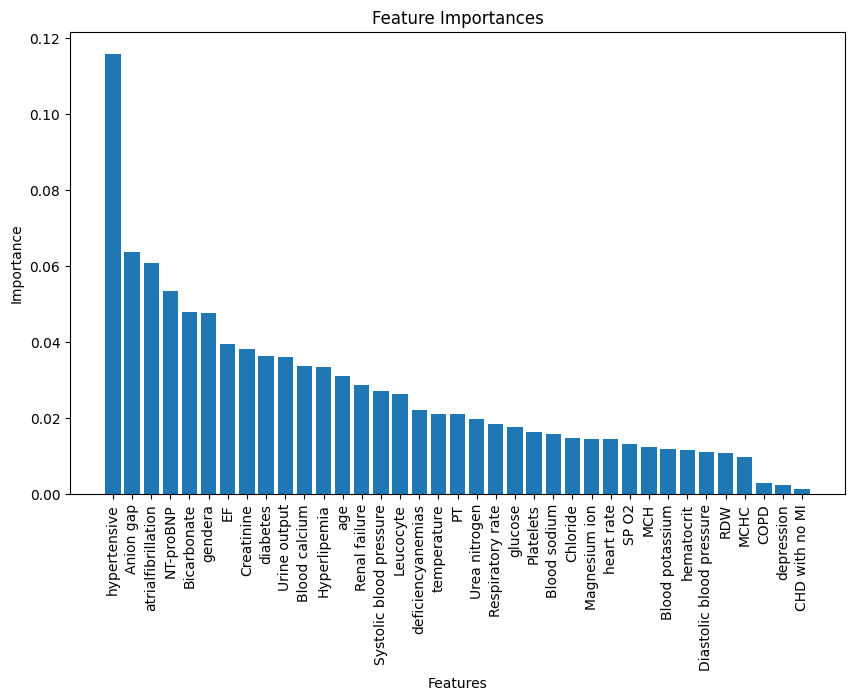

In [ ]:
# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_dev_smote, y_dev_smote)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
rf_predictions_tuned = best_rf_model.predict(X_test)

tuned_rf_accuracy = accuracy_score(y_test, rf_predictions_tuned)
tuned_rf_precision = precision_score(y_test, rf_predictions_tuned)
tuned_rf_recall = recall_score(y_test, rf_predictions_tuned)
tuned_rf_f1 = f1_score(y_test, rf_predictions_tuned)
tuned_rf_roc_auc = roc_auc_score(y_test, rf_predictions_tuned)

print("\nTuned Random Forest Model Performance:")
print(f"Accuracy: {tuned_rf_accuracy:.3f}")
print(f"Precision: {tuned_rf_precision:.3f}")
print(f"Recall: {tuned_rf_recall:.3f}")
print(f"F1-Score: {tuned_rf_f1:.3f}")
print(f"ROC AUC: {tuned_rf_roc_auc:.3f}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best AUC Score: 0.9553711098803938

Tuned Random Forest Model Performance:
Accuracy: 0.907
Precision: 1.000
Recall: 0.312
F1-Score: 0.476
ROC AUC: 0.656


# **Gradient Boosting**

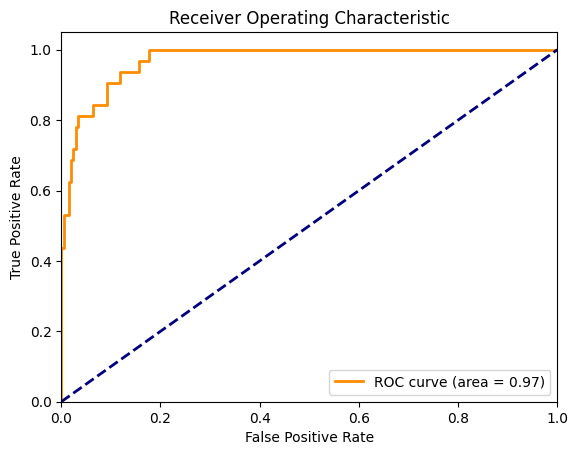


---Gradient Boosting Model Performance Metrics---
Accuracy: 0.928
Precision: 0.941
Recall: 0.500
F1-Score: 0.653
ROC AUC: 0.971


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create an instance of the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model using the SMOTE processed development dataset
gb_classifier.fit(X_dev_smote, y_dev_smote)

# Predict on the aligned test set
gb_predictions = gb_classifier.predict(X_test)
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate and print other performance metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_probs)  # Using probabilities for AUC calculation

print("\n---Gradient Boosting Model Performance Metrics---")
print(f"Accuracy: {gb_accuracy:.3f}")
print(f"Precision: {gb_precision:.3f}")
print(f"Recall: {gb_recall:.3f}")
print(f"F1-Score: {gb_f1:.3f}")
print(f"ROC AUC: {gb_roc_auc:.3f}")

In [ ]:
#Visualization functions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_feature_importances(model, features, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances in {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

In [ ]:
# Visualization for Gradient Boosting
plot_confusion_matrix(gb_classifier, X_test, y_test, "Gradient Boosting")

In [ ]:
# Visualization for Gradient Boosting
plot_feature_importances(gb_classifier, X.columns, "Gradient Boosting")

# **XGBoost**

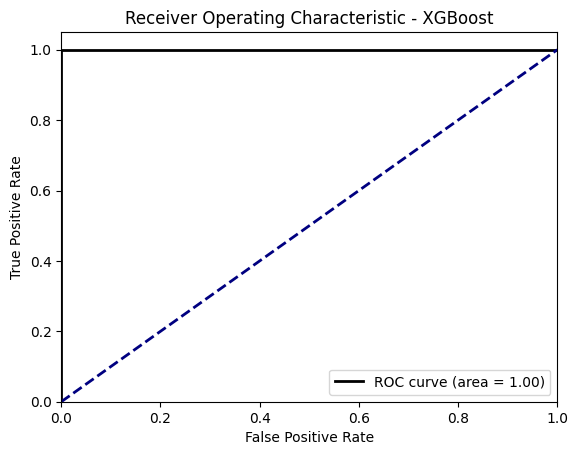


---XGBoost Model Performance---
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
ROC AUC: 1.000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Instantiate an XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the classifier to the training data
xgb_classifier.fit(X_dev_smote, y_dev_smote)

# Predict the probabilities of the test set
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate accuracy and other metrics
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)  # Using probabilities for AUC calculation

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Print model performance metrics
print("\n---XGBoost Model Performance---")
print(f"Accuracy: {xgb_accuracy:.3f}")
print(f"Precision: {xgb_precision:.3f}")
print(f"Recall: {xgb_recall:.3f}")
print(f"F1-Score: {xgb_f1:.3f}")
print(f"ROC AUC: {xgb_roc_auc:.3f}")

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_dev_smote, y_dev_smote)

print("Best Hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
xgb_predictions_tuned = best_xgb_model.predict(X_test)

tuned_xgb_accuracy = accuracy_score(y_test, xgb_predictions_tuned)
tuned_xgb_precision = precision_score(y_test, xgb_predictions_tuned)
tuned_xgb_recall = recall_score(y_test, xgb_predictions_tuned)
tuned_xgb_f1 = f1_score(y_test, xgb_predictions_tuned)
tuned_xgb_roc_auc = roc_auc_score(y_test, xgb_predictions_tuned)

print("\nTuned XGBoost Performance:")
print(f"Accuracy: {tuned_xgb_accuracy:.6f}")
print(f"Precision: {tuned_xgb_precision:.6f}")
print(f"Recall: {tuned_xgb_recall:.6f}")
print(f"F1-Score: {tuned_xgb_f1:.6f}")
print(f"ROC AUC: {tuned_xgb_roc_auc:.6f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:35:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Tuned XGBoost Performance:
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1-Score: 1.000000
ROC AUC: 1.000000


In [ ]:
# Visualization for XGBoost
plot_confusion_matrix(xgb_classifier, X_test, y_test, "XGBoost")

In [ ]:
# Visualization for XGBoost
plot_feature_importances(xgb_classifier, X.columns, "XGBoost")

In [ ]:
# Identify binary columns
binary_columns_dev = [col for col in X_dev.columns if df[col].nunique() == 2]
# Separate binary and non-binary columns
binary_data_dev = X_dev[binary_columns_dev]
non_binary_data_dev = X_dev.drop(columns=binary_columns_dev)

# Apply StandardScaler on non-binary columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_binary_data_dev)

# Create DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=non_binary_data_dev.columns)

# Concatenate binary and scaled non-binary data
final_df = pd.concat([binary_data_dev, scaled_df], axis=1)
X_dev_scaled = final_df

# Identify binary columns
binary_columns_test = [col for col in X_test.columns if df[col].nunique() == 2]

# Separate binary and non-binary columns
binary_data_test = X_test[binary_columns_test]
non_binary_data_test = X_test.drop(columns=binary_columns_test)

# Apply StandardScaler on non-binary columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_binary_data_test)

# Create DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=non_binary_data_test.columns)

# Concatenate binary and scaled non-binary data
final_df = pd.concat([binary_data_test, scaled_df], axis=1)
X_test_scaled = final_df


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Applying PCA after scaling
pca = PCA(n_components=0.95)  # Retaining 95% of variance
X_dev_pca = pca.fit_transform(X_dev)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

# Decision Tree Classifier
dt_classifier_baseline = DecisionTreeClassifier(max_depth=10, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate AUC and Average Precision scores for Decision Tree using cross-validation
dt_auc_scores = cross_val_score(dt_classifier_baseline, X_dev_pca, y_dev, cv=cv, scoring='roc_auc')
dt_ap_scores = cross_val_score(dt_classifier_baseline, X_dev_pca, y_dev, cv=cv, scoring='average_precision')

print("Decision Tree Classifier:")
print("AUC scores for 5-fold cross-validation:")
for i, auc_score in enumerate(dt_auc_scores):
    print(f"Fold {i + 1}: {auc_score:.2f}")

print("\nAverage Precision scores for 5-fold cross-validation:")
for i, ap_score in enumerate(dt_ap_scores):
    print(f"Fold {i + 1}: {ap_score:.2f}")

dt_mean_auc = dt_auc_scores.mean()
dt_mean_ap = dt_ap_scores.mean()
print("\nMean AUC:", dt_mean_auc)
print("Mean Average Precision:", dt_mean_ap)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Calculate AUC and Average Precision scores for Random Forest using cross-validation
rf_auc_scores = cross_val_score(rf_classifier, X_dev_pca, y_dev, cv=cv, scoring='roc_auc')
rf_ap_scores = cross_val_score(rf_classifier, X_dev_pca, y_dev, cv=cv, scoring='average_precision')

print("\nRandom Forest Classifier:")
print("AUC scores for 5-fold cross-validation:")
for i, auc_score in enumerate(rf_auc_scores):
    print(f"Fold {i + 1}: {auc_score:.2f}")

print("\nAverage Precision scores for 5-fold cross-validation:")
for i, ap_score in enumerate(rf_ap_scores):
    print(f"Fold {i + 1}: {ap_score:.2f}")

rf_mean_auc = rf_auc_scores.mean()
rf_mean_ap = rf_ap_scores.mean()
print("\nMean AUC:", rf_mean_auc)
print("Mean Average Precision:", rf_mean_ap)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_dev_pca, y_dev)

# Predict on the test set
gb_predictions = gb_classifier.predict(X_test_pca)

# Evaluate the model performance
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_predictions)

print("Gradient Boosting Model Performance:")
print(f"Accuracy: {gb_accuracy:.3f}")
print(f"Precision: {gb_precision:.3f}")
print(f"Recall: {gb_recall:.3f}")
print(f"F1-Score: {gb_f1:.3f}")
print(f"ROC AUC: {gb_roc_auc:.3f}")

In [ ]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_dev_pca, y_dev)

# Predict on the test set
xgb_predictions = xgb_classifier.predict(X_test_pca)

# Evaluate the model performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)

print("XGBoost Model Performance:")
print(f"Accuracy: {xgb_accuracy:.3f}")
print(f"Precision: {xgb_precision:.3f}")
print(f"Recall: {xgb_recall:.3f}")
print(f"F1-Score: {xgb_f1:.3f}")
print(f"ROC AUC: {xgb_roc_auc:.3f}")

INCORRECT COMMENTED OUT BELOW

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import StratifiedKFold

# # Assuming you have four different models: model1, model2, model3, model4
# models = [dt_classifier_smote, rf_model, gb_classifier, xgb_classifier]
# model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]

# # Initialize the plot
# plt.figure(figsize=(8, 8))

# # Define the number of folds for cross-validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Plot ROC curve for each model
# for model, name in zip(models, model_names):
#     mean_fpr = np.linspace(0, 1, 100)
#     tpr_list = []
#     auc_list = []

#     for train, test in cv.split(X_dev_smote, y_dev_smote):
#         model.fit(X_dev_smote.iloc[train], y_dev_smote.iloc[train])
#         predictions = model.predict_proba(X_dev_smote.iloc[test])[:, 1]
#         fpr, tpr, _ = roc_curve(y_dev_smote.iloc[test], predictions)
#         tpr_interp = np.interp(mean_fpr, fpr, tpr)
#         tpr_interp[0] = 0.0
#         tpr_list.append(tpr_interp)

#     mean_tpr = np.mean(tpr_list, axis=0)
#     mean_auc = auc(mean_fpr, mean_tpr)
#     auc_list.append(mean_auc)

#     # Plot the ROC curve
#     plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")

# # Plot the random classifier for reference
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# # Customize the plot
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison for Multiple Models')
# plt.legend(loc='lower right')

# # Show the plot
# plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:39:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


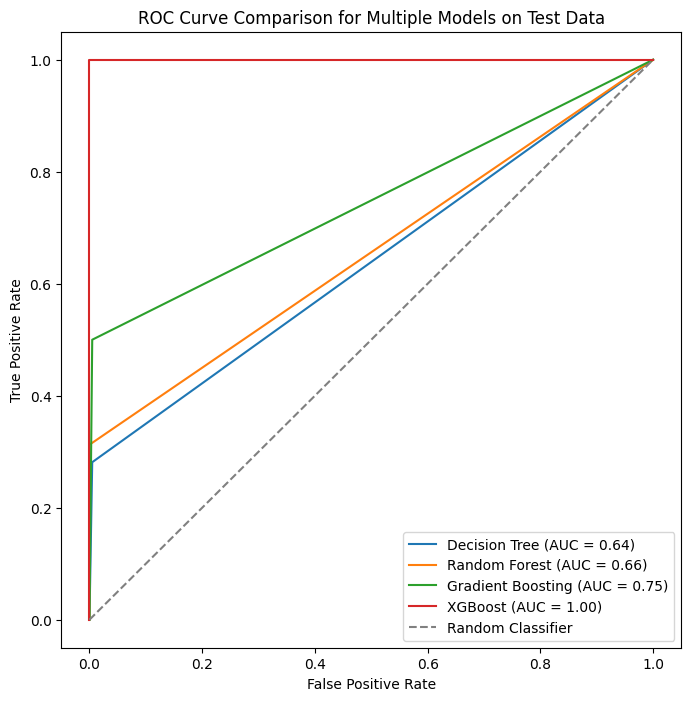

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have four different models: model1, model2, model3, model4
models = [dt_classifier_smote, best_rf_model, gb_classifier, best_xgb_model]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]

# Initialize the plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for each model using test data
for model, name in zip(models, model_names):
    model.fit(X_dev_smote, y_dev_smote)  # Train on the entire development set

    # Predict probabilities on the test set
    predictions = model.predict(X_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, predictions)
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot the random classifier for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models on Test Data')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming you have four different models: dt_classifier_smote, rf_model, gb_classifier, xgboost_classifier
models = [dt_classifier_smote, rf_model, gb_classifier, best_xgb_model]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
f1_scores = []

# Calculate F1 score for each model using test data
for model in models:
    model.fit(X_dev_smote, y_dev_smote)  # Train on the entire development set

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate F1 score and append to the list
    score = f1_score(y_test, predictions)
    f1_scores.append(score)

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Multiple Models on Test Data')
plt.ylim([0, 1])

plt.show()
